In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [2]:
df = pd.read_csv(r"C:\Users\Robin Bhardwaj\Downloads\IRIS.csv")

In [13]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [17]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [19]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [21]:
df['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [39]:
mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['species'] = df['species'].map(mapping)


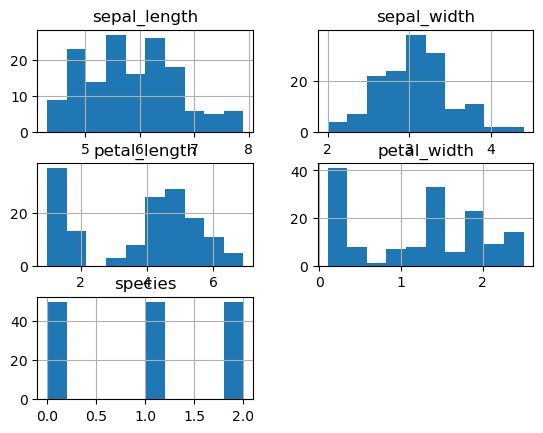

In [40]:
df.hist()
plt.show()


In [45]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

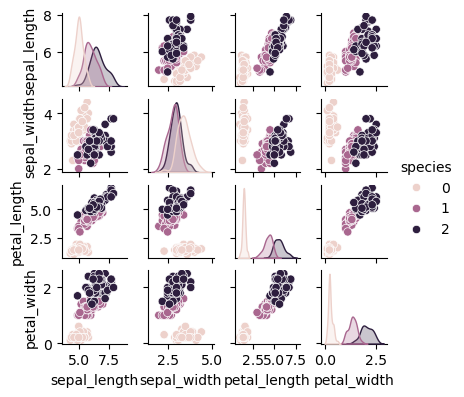

In [47]:
sns.pairplot(data=df,hue='species',height=1)

In [51]:
from sklearn.model_selection import train_test_split

X = df.drop(['species'],axis=1)
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


In [65]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [77]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [79]:
pred = model_logistic.predict(X_test)
pred

array([0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 1, 2, 0, 2,
       0, 0, 0, 1, 0, 2, 2, 2], dtype=int64)

In [81]:
pred_prod = model_logistic.predict_proba(X_test)[:, 1]
pred_prod

array([0.02037859, 0.03687532, 0.06617876, 0.02916452, 0.02562814,
       0.14598609, 0.04175573, 0.83104776, 0.01332083, 0.04103991,
       0.18194562, 0.33665445, 0.06364247, 0.11534637, 0.03788039,
       0.07119294, 0.03853108, 0.05346314, 0.78431296, 0.18906875,
       0.04143843, 0.40245405, 0.0230343 , 0.02072033, 0.02754185,
       0.79171058, 0.02252866, 0.00604956, 0.04437313, 0.00549999])

In [94]:
# Train Accuracy

pred = model_logistic.predict(X_train)
pred_prod = model_logistic.predict_proba(X_train)[:, 1]

print("Train Accuracy: ", accuracy_score(y_train, pred))
print("Train Precision: ", precision_score(y_train, pred,average='macro'))
print("Train Recall: ", recall_score(y_train, pred,average='macro'))
print("Train F1 Score: ", f1_score(y_train, pred,average='macro'))
print("Train Classification_report :", classification_report(y_train, pred))


Train Accuracy:  0.9916666666666667
Train Precision:  0.9916666666666667
Train Recall:  0.9925925925925926
Train F1 Score:  0.9920352723652397
Train Classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      0.98      0.99        45
           2       0.97      1.00      0.99        39

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [96]:
# Train Accuracy

pred = model_logistic.predict(X_test)
pred_prod = model_logistic.predict_proba(X_test)[:, 1]

print("Train Accuracy: ", accuracy_score(y_test, pred))
print("Train Precision: ", precision_score(y_test, pred,average='macro'))
print("Train Recall: ", recall_score(y_test, pred,average='macro'))
print("Train F1 Score: ", f1_score(y_test, pred,average='macro'))
print("Train Classification_report :", classification_report(y_test, pred))


Train Accuracy:  0.9333333333333333
Train Precision:  0.9487179487179488
Train Recall:  0.8666666666666667
Train F1 Score:  0.8888888888888888
Train Classification_report :               precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.60      0.75         5
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.87      0.89        30
weighted avg       0.94      0.93      0.93        30



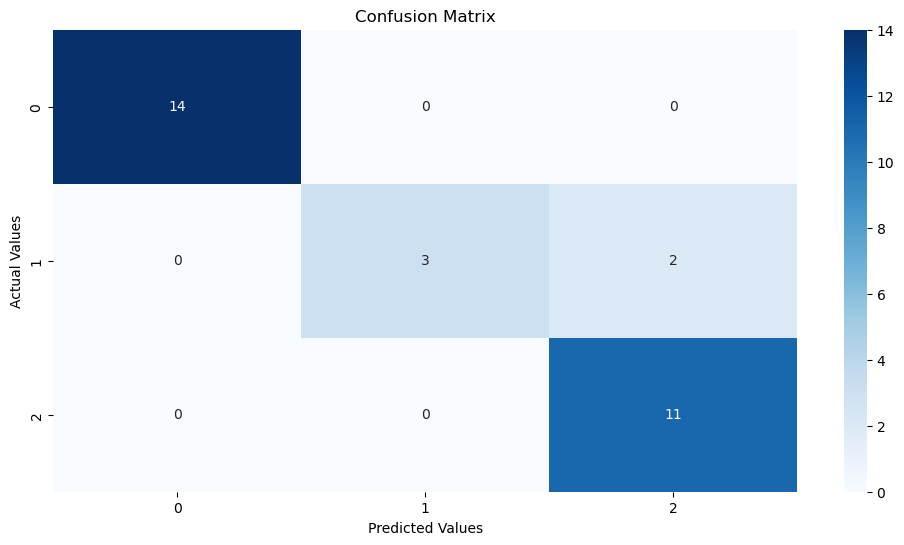

In [99]:
import matplotlib.pyplot as plt
pred = model_logistic.predict(X_test)
cm=confusion_matrix(y_test,pred)
plt.figure(figsize=(12,6))
plt.title("Confusion Matrix")
sns.heatmap(cm, annot=True,fmt='d', cmap='Blues')
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.savefig('confusion_matrix.png')